In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import random
from sklearn import mixture
from scipy import stats
from matplotlib.patches import Ellipse
import sklearn.metrics as m


random.seed(10)
np.random.seed(10)

# The 1D-case

First, we generate the artifical 1D-data.

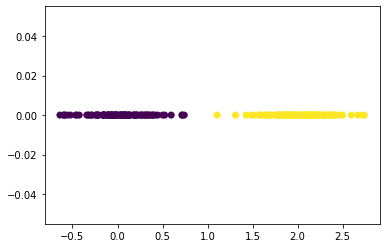

In [3]:
mu1, sigma1 = 0, 0.3 # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 100)
y1 = np.repeat(0, 100)
mu2, sigma2 = 2, 0.3 # mean and standard deviation
s2 = np.random.normal(mu2, sigma2, 100)
y2 = np.repeat(1, 100)
mu = [mu1, mu2]
sigma = [sigma1, sigma2]
data = np.concatenate([s1,s2])
y = np.concatenate([y1,y2])

data2d=np.zeros((200,2))
data2d[:,0]=data

plt.scatter(data2d[:,0],data2d[:,1],c=y)

Then, we can use the EM-algorithm to fit the Gaussian Mixture Model.

In [4]:
def pr_single_comp(mu, sigma, x):
    prob = []
    for i in range(0, x.shape[0]) :
        prob.append(np.exp(-0.5*((x[i,]-mu)/sigma)**2)/sigma)
    return prob

def pr_single_normalized(mu,sigma, x):
    unnorm_prob = pr_single_comp(mu, sigma, x)
    normalization = np.sum(pr_single_comp(mu, sigma, x), axis=1)
    prob = []
    for i in range(0, len(unnorm_prob)) :
        prob.append(unnorm_prob[:][i]/normalization[i])
    return prob
def update_mu(x,mu,sigma) :
    prob = pr_single_normalized(mu,sigma,x)
    hat_mu = [0, 0]
    for i in range(0, len(prob)) :
        hat_mu += prob[i][:]*x[i,]
    hat_mu = hat_mu/np.sum(pr_single_normalized(mu, sigma, x), axis=0)
    return hat_mu
def update_sigma(x,mu,sigma) :
    prob = pr_single_normalized(mu,sigma,x)
    hat_sigma = [0, 0]
    for i in range(0, len(prob)) :
        hat_sigma += prob[i][:]*(x[i,] - mu)**2
    hat_sigma = hat_sigma/np.sum(pr_single_normalized(mu, sigma, x), axis=0)
    return hat_sigma

mu_old = [random.uniform(-2, 2), random.uniform(0, 4)]
sigma_old = [0.3, 0.3]
NbIter = 10
# Learning procedure (optimization)
for iter in range(1, NbIter):
    hat_mu = update_mu(data,mu_old,sigma_old)
    hat_sigma = update_sigma(data,mu_old,sigma_old)
    print("iter ", iter)
    print('updated mu = ',hat_mu)
    print('updated sigma = ',hat_sigma)
    mu_old = hat_mu
    sigma_old = hat_sigma + 1e-13



iter  1
updated mu =  [0.02537397 2.02173072]
updated sigma =  [0.153597  0.1805706]
iter  2
updated mu =  [0.02382508 2.02075922]
updated sigma =  [0.08416736 0.08738053]
iter  3
updated mu =  [0.023825   2.02075916]
updated sigma =  [0.08416488 0.08737963]
iter  4
updated mu =  [0.023825   2.02075916]
updated sigma =  [0.08416488 0.08737963]
iter  5
updated mu =  [0.023825   2.02075916]
updated sigma =  [0.08416488 0.08737963]
iter  6
updated mu =  [0.023825   2.02075916]
updated sigma =  [0.08416488 0.08737963]
iter  7
updated mu =  [0.023825   2.02075916]
updated sigma =  [0.08416488 0.08737963]
iter  8
updated mu =  [0.023825   2.02075916]
updated sigma =  [0.08416488 0.08737963]
iter  9
updated mu =  [0.023825   2.02075916]
updated sigma =  [0.08416488 0.08737963]


Here, we see that the two means of the Gaussian Models are near to real values. However, the standard deviations could not be approximated as well as the means. <br>
Overall, we can see that the algorithm works. 


# The 2D-case

Now, we will apply the EM-algorithm on 2D-data. For this we first generate the data.

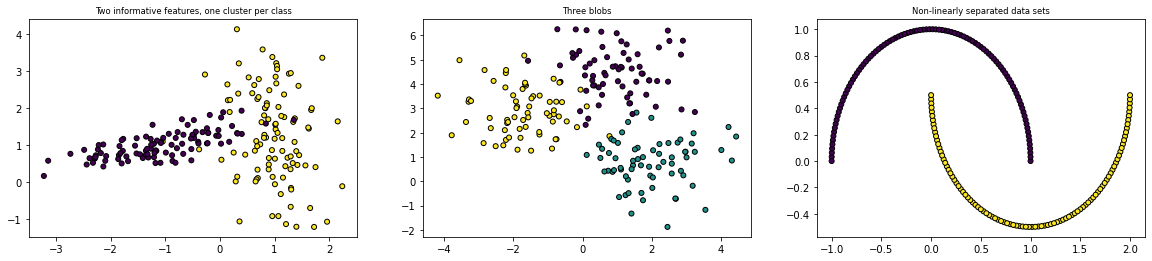

In [5]:
fig,(ax1,ax2,ax3)=plt.subplots(1, 3,figsize=[20,4])

ax1.set_title("Two informative features, one cluster per class", fontsize="small")
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1,random_state=0)
ax1.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1,s=25, edgecolor="k")

ax2.set_title("Three blobs", fontsize="small")
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3,random_state=0)
ax2.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor="k")

ax3.set_title("Non-linearly separated data sets", fontsize="small")
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=0)
_=ax3.scatter(X3[:, 0], X3[:, 1], marker="o", c=Y3, s=25, edgecolor="k")



Now, we have to modify the algorithm a bit. The means and standard deviations become now vector and matrices. Howver, the structure of the algorithm stays obviously the same.

In [6]:
def pr_single_comp(mu, cov, x):
    prob = []
    for j in range(len(mu)):
        prob.append(stats.multivariate_normal(mu[j],cov[j]).pdf(x))
    prob=np.array(prob)
    return prob.transpose()

def pr_single_normalized(mu,cov, x):
    unnorm_prob = pr_single_comp(mu, cov, x)
    normalization = np.sum(unnorm_prob, axis=1)
    prob=np.zeros((x.shape[0],len(mu)))
    for i in range(len(mu)):
        prob[:,i]=(unnorm_prob[:,i]/normalization[:])

    return prob
    
def update_mu(x,mu,cov) :
    prob = pr_single_normalized(mu,cov,x)
    hat_mu=[]
    for _ in range(len(mu)):
        hat_mu.append(np.zeros(2))
    
    for k in range(len(mu)):   
        for i in range(prob.shape[0]):
            hat_mu[k] +=prob[i,k]*x[i,:]
        hat_mu[k] /= np.sum(prob, axis=0)[k]
    return hat_mu

def update_sigma(x,mu,cov) :
    prob = pr_single_normalized(mu,cov,x)
    hat_sigma=[]
    for _ in range(len(mu)):
        hat_sigma.append(np.zeros((2,2)))

    for k in range(len(cov)):
        for i in range(prob.shape[0]) :
            hat_sigma[k] += prob[i,k]*np.outer((x[i,:] - mu[k]),(x[i,:] - mu[k]))
        hat_sigma[k] /= np.sum(prob, axis=0)[k]
    return hat_sigma

def get_random_sigma(n):
    x = np.random.normal(0, 1, size=(n, n))
    return np.dot(x, x.transpose())

def run_em(data,n,NbIter=10):  
    mu_old=[]
    sigma_old=[]
    for _ in range(n):
        mu_old.append(np.random.uniform(0,1,size=(2,)))
        sigma_old.append(get_random_sigma(2))
    # Learning procedure (optimization)
    for _ in range(1, NbIter):
        hat_mu = update_mu(data,mu_old,sigma_old)
        hat_sigma = update_sigma(data,mu_old,sigma_old)
        mu_old = hat_mu
        sigma_old = hat_sigma
    print('Last mu = ',hat_mu)
    print('Last sigma = ',hat_sigma)
    return mu_old,sigma_old

Last mu =  [array([1.97209737, 0.84139847]), array([0.8903373 , 4.52434448]), array([-1.70266658,  2.87822223])]
Last sigma =  [array([[1.03905179, 0.05709949],
       [0.05709949, 1.03099209]]), array([[ 0.92967551, -0.00508628],
       [-0.00508628,  0.92129439]]), array([[ 0.98806549, -0.10546163],
       [-0.10546163,  0.95200186]])]


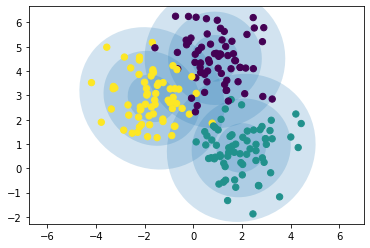

In [12]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax 
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


X=X2
Y=Y2
n=3     #number of Gaussian models in the mixture model
mu,sig=run_em(X,n,20)
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap='viridis', zorder=2)
ax.axis('equal')
for i in range(len(mu)):
    draw_ellipse(mu[i], sig[i],ax=ax,alpha=0.2)



We applied the algorithm for the make_blobs dataset. We can visualize the results quite nicely with the ellipses which represent the underlying Gaussian distribution. So we can see that algorithm works very well.<br><br>
Now, we use the algorithms from the sklearn library.

Best Covariance Type: full 	 Best number of components: 3
homogeneity score: 0.790266053439724
completeness score: 0.7908107465359284
v measure score: 0.7905383061623495
adjusted rand score: 0.8427840848420685


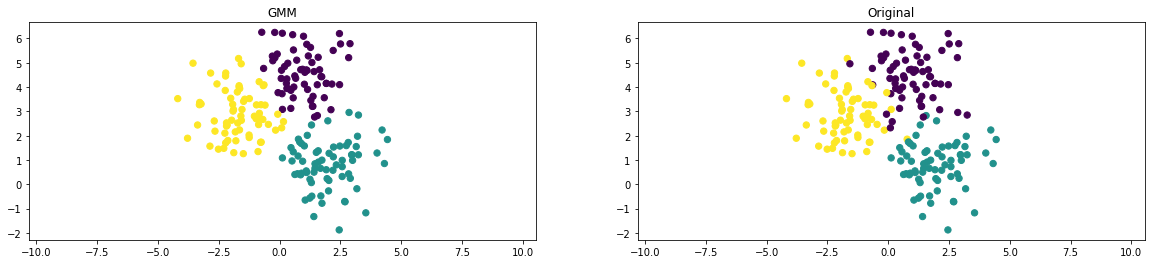

In [13]:
from sklearn import mixture

X=X2
Y=Y2
n_components = 3

lowest_bic = np.infty
bic = []
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
        best_gmm = gmm
y_predicted = best_gmm.predict(X)
print("Best Covariance Type: %s \t Best number of components: %d" % (best_gmm.covariance_type,best_gmm.n_components))

print("homogeneity score: " + str(m.homogeneity_score(Y,y_predicted)))
print("completeness score: " + str(m.completeness_score(Y,y_predicted)))
print("v measure score: " + str(m.v_measure_score(Y,y_predicted)))
print("adjusted rand score: " + str(m.adjusted_rand_score(Y,y_predicted)))



n=best_gmm.n_components
fig,(ax1,ax2)=plt.subplots(1, 2,figsize=[20,4])
ax1.scatter(X[:, 0], X[:, 1], c=y_predicted, s=40, cmap='viridis', zorder=2)
ax1.axis('equal')
ax1.set_title("GMM")
ax2.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap='viridis', zorder=2)
ax2.axis('equal')
_=ax2.set_title("Original")




We see that best covariance type in this case is "full". With that algorithm we obtain quite good clustering scores around 0.8. Moreover, the visualized reuslts are also quite satisfying.

# MICE Dataset

Now, we wonder if we can apply the algorithm also on even higher-dimensional data sets like the MICE data set from the last exercise.<br>
We have to modify the data first in order to work with it (see last exercise). Then we apply the Gaussian mixture model.

In [14]:
dataset=pd.read_excel("Data_Cortex_Nuclear.xls")
#fill the NaN cells with mean of each column
dataset['DYRK1A_N'].fillna(dataset['DYRK1A_N'].mean(axis=0),inplace=True)
dataset['ITSN1_N'].fillna(dataset['ITSN1_N'].mean(axis=0),inplace=True)
dataset['BDNF_N'].fillna(dataset['BDNF_N'].mean(axis=0),inplace=True)
dataset['NR1_N'].fillna(dataset['NR1_N'].mean(axis=0),inplace=True)
dataset['NR2A_N'].fillna(dataset['NR2A_N'].mean(axis=0),inplace=True)
dataset['pAKT_N'].fillna(dataset['pAKT_N'].mean(axis=0),inplace=True)
dataset['pBRAF_N'].fillna(dataset['pBRAF_N'].mean(axis=0),inplace=True)
dataset['pCAMKII_N'].fillna(dataset['pCAMKII_N'].mean(axis=0),inplace=True)
dataset['pCREB_N'].fillna(dataset['pCREB_N'].mean(axis=0),inplace=True)
dataset['pELK_N'].fillna(dataset['pELK_N'].mean(axis=0),inplace=True)
dataset['pERK_N'].fillna(dataset['pERK_N'].mean(axis=0),inplace=True)
dataset['pJNK_N'].fillna(dataset['pJNK_N'].mean(axis=0),inplace=True)
dataset['PKCA_N'].fillna(dataset['PKCA_N'].mean(axis=0),inplace=True)
dataset['pMEK_N'].fillna(dataset['pMEK_N'].mean(axis=0),inplace=True)
dataset['pNR1_N'].fillna(dataset['pNR1_N'].mean(axis=0),inplace=True)
dataset['pNR2A_N'].fillna(dataset['pNR2A_N'].mean(axis=0),inplace=True)
dataset['pNR2B_N'].fillna(dataset['pNR2B_N'].mean(axis=0),inplace=True)
dataset['pPKCAB_N'].fillna(dataset['pPKCAB_N'].mean(axis=0),inplace=True)
dataset['pRSK_N'].fillna(dataset['pRSK_N'].mean(axis=0),inplace=True)
dataset['AKT_N'].fillna(dataset['AKT_N'].mean(axis=0),inplace=True)
dataset['BRAF_N'].fillna(dataset['BRAF_N'].mean(axis=0),inplace=True)
dataset['CAMKII_N'].fillna(dataset['CAMKII_N'].mean(axis=0),inplace=True)
dataset['CREB_N'].fillna(dataset['CREB_N'].mean(axis=0),inplace=True)
dataset['ELK_N'].fillna(dataset['ELK_N'].mean(axis=0),inplace=True)
dataset['ERK_N'].fillna(dataset['ERK_N'].mean(axis=0),inplace=True)
dataset['GSK3B_N'].fillna(dataset['GSK3B_N'].mean(axis=0),inplace=True)
dataset['JNK_N'].fillna(dataset['JNK_N'].mean(axis=0),inplace=True)
dataset['MEK_N'].fillna(dataset['MEK_N'].mean(axis=0),inplace=True)
dataset['TRKA_N'].fillna(dataset['TRKA_N'].mean(axis=0),inplace=True)
dataset['RSK_N'].fillna(dataset['RSK_N'].mean(axis=0),inplace=True)
dataset['APP_N'].fillna(dataset['APP_N'].mean(axis=0),inplace=True)
dataset['Bcatenin_N'].fillna(dataset['Bcatenin_N'].mean(axis=0),inplace=True)
dataset['SOD1_N'].fillna(dataset['SOD1_N'].mean(axis=0),inplace=True)
dataset['MTOR_N'].fillna(dataset['MTOR_N'].mean(axis=0),inplace=True)
dataset['P38_N'].fillna(dataset['P38_N'].mean(axis=0),inplace=True)
dataset['pMTOR_N'].fillna(dataset['pMTOR_N'].mean(axis=0),inplace=True)
dataset['DSCR1_N'].fillna(dataset['DSCR1_N'].mean(axis=0),inplace=True)
dataset['AMPKA_N'].fillna(dataset['AMPKA_N'].mean(axis=0),inplace=True)
dataset['NR2B_N'].fillna(dataset['NR2B_N'].mean(axis=0),inplace=True)
dataset['pNUMB_N'].fillna(dataset['pNUMB_N'].mean(axis=0),inplace=True)
dataset['RAPTOR_N'].fillna(dataset['RAPTOR_N'].mean(axis=0),inplace=True)
dataset['TIAM1_N'].fillna(dataset['TIAM1_N'].mean(axis=0),inplace=True)
dataset['pP70S6_N'].fillna(dataset['pP70S6_N'].mean(axis=0),inplace=True)
dataset['BAD_N'].fillna(dataset['BAD_N'].mean(axis=0),inplace=True)
dataset['BCL2_N'].fillna(dataset['BCL2_N'].mean(axis=0),inplace=True)
dataset['pCFOS_N'].fillna(dataset['pCFOS_N'].mean(axis=0),inplace=True)
dataset['H3AcK18_N'].fillna(dataset['H3AcK18_N'].mean(axis=0),inplace=True)
dataset['EGR1_N'].fillna(dataset['EGR1_N'].mean(axis=0),inplace=True)
dataset['H3MeK4_N'].fillna(dataset['H3MeK4_N'].mean(axis=0),inplace=True)

data=dataset.drop(["MouseID",'Genotype','Treatment','Behavior','class'], axis=1)
classes = np.vectorize({'c-CS-m':0,'c-CS-s':1,'c-SC-m':2,'c-SC-s':3,'t-CS-m':4,'t-CS-s':5,'t-SC-m':6,'t-SC-s':7}.get)(dataset['class'])

n_comp=8
gmm = mixture.GaussianMixture(n_components=n_components,covariance_type="full")
predictions=gmm.fit_predict(data)

print("homogeneity score: " + str(m.homogeneity_score(classes,predictions)))
print("completeness score: " + str(m.completeness_score(classes,predictions)))
print("v measure score: " + str(m.v_measure_score(classes,predictions)))
print("adjusted rand score: " + str(m.adjusted_rand_score(classes,predictions)))

(predictions>3).any()


homogeneity score: 0.14509052166355033
completeness score: 0.27405876716136707
v measure score: 0.18973349378875715
adjusted rand score: 0.11740364599982493


False

We can conclude that the algorithm does not work well on this data set. The scores are very low (around 0.2). Moreover, we see that the predictions consist only the classes 0,1,2 even though there are classes from 0 to 7.

# Breast Cancer data set

Let's try another high-dimensional data set, the breast cancer data set.

In [15]:
column_names=["Sample code number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape",
"Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli",
"Mitoses","Class"
]
bcw=pd.read_table("breast-cancer-wisconsin.data",sep=",",header=0,names=column_names,na_values=["?"])
bcw.dropna(axis=0,inplace=True)
classes=bcw["Class"]/2 -1
data=bcw.iloc[:,1:10]

n_comp=2
gmm = mixture.GaussianMixture(n_components=n_components,covariance_type="full")
predictions=gmm.fit_predict(data)

print("homogeneity score: " + str(m.homogeneity_score(classes,predictions)))
print("completeness score: " + str(m.completeness_score(classes,predictions)))
print("v measure score: " + str(m.v_measure_score(classes,predictions)))
print("adjusted rand score: " + str(m.adjusted_rand_score(classes,predictions)))

homogeneity score: 0.5932001128650833
completeness score: 0.3804995532514352
v measure score: 0.4636180657924866
adjusted rand score: 0.5026276334319554


Here, the results are a bit better (around 0.5), but still not that good.

# Conclusion

Overall, we can conclude the Gaussian mixture model only works for low-dimensional data sets. The higher the dimension, the worse are the results. <br>
For example, the model worked very well for 1D or 2D data. The performance got worse with the Breast-Cancer data set which is a 10-dimensional data set. The worst performance has the data set with the highest dimension, the MICE data set which is 77-dimsional.